# NLP Basic Assignment
## NLP 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [1]:
# 필요한 모듈 불러오기
import pandas as pd

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [2]:
spam = pd.read_csv('spam.csv')

In [3]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

#### 변수 속성 및 크기 확인

In [4]:
print(spam.info())
print(spam.shape)
spam.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
(5572, 2)


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### v1열 ham, spam을 각각 0,1로 변경

In [5]:
spam['v1'] = spam['v1'].replace(['ham', 'spam'], [0,1])
spam.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
print(spam.info())
print(spam.shape)
spam.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB
None
(5572, 2)


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### 중복값 확인 및 제거

In [7]:
spam[spam.duplicated()]

,v1,v2
102,0,As per your request 'Melle Melle (Oru Minnamin...
153,0,As per your request 'Melle Melle (Oru Minnamin...
206,0,"As I entered my cabin my PA said, '' Happy B'd..."
222,0,"Sorry, I'll call later"
325,0,No calls..messages..missed calls
...,...,...
5524,1,You are awarded a SiPix Digital Camera! call 0...
5535,0,"I know you are thinkin malaria. But relax, chi..."
5539,0,Just sleeping..and surfing
5553,0,Hahaha..use your brain dear


In [8]:
spam.drop_duplicates(subset=['v2'], inplace=True)
print(spam.shape)
spam.head()

(5169, 2)


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### 데이터 ham, spam 비율 비교

<AxesSubplot:>

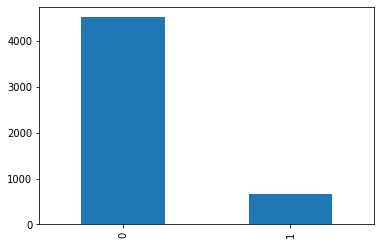

In [9]:
spam['v1'].value_counts().plot(kind='bar')

## Tokenizing


In [10]:
import nltk

In [11]:
# 예시 코드 코드
from nltk.tokenize import word_tokenize

nltk.download('punkt')
word_tokenize(spam.iloc[5]['v2'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zyunhyeok\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'I',
 "'d",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 '?',
 'Tb',
 'ok',
 '!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send',
 ',',
 'å£1.50',
 'to',
 'rcv']

#### 특수문자 제거 후 소문자로 통일

In [12]:
import re

def remove_special_symbols(data):
    text = re.sub('[^a-zA-Z]', ' ', data).lower()
    return text

spam['v2'] = spam['v2'].apply(remove_special_symbols)

#### 불용어 리스트

In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english')) 
print(stop_words)

{'own', 'he', 'weren', 'only', 'under', 'does', 'am', 'this', "don't", 'where', "mustn't", 'if', 'again', 'themselves', 'were', 'during', 'for', 'to', 'more', 'their', 'over', 'up', "hadn't", "won't", 'will', 'such', 'on', 'wasn', 'of', 'because', "you're", 'some', 'his', 'you', 'with', 'ma', 'below', 'yours', 'just', "doesn't", 'hers', 'from', 'had', 'is', "couldn't", 'ourselves', 'each', 'it', 'our', 'doing', 'off', 'aren', 'him', 'and', 'theirs', 'd', 'into', 'm', 'myself', "wasn't", 'himself', 'out', 'hadn', 'herself', "isn't", "aren't", 'against', "you'd", "she's", "shouldn't", 'do', 't', 'any', 'no', 'didn', 'about', 'not', 'too', 'yourselves', "it's", 'having', 'other', 'very', 'than', 'i', 're', 'mustn', 'me', 'at', 'y', 'while', 'shan', 'once', 'should', "you'll", 'itself', 'o', 's', 'that', 'ours', 'your', 'by', 'the', 'further', "mightn't", "needn't", 'being', 'did', 'now', 'why', 'couldn', 'yourself', 'they', "hasn't", 'through', 'here', 'shouldn', 'then', 'who', 'my', 'who

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zyunhyeok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### word_tokenize

In [14]:
wd_test = spam.copy()
result = []
for row in wd_test.v2:
    tokenize = word_tokenize(row)
    # 불용어 제거
    words = [word for word in tokenize if word not in stop_words] 
    result.append(words)

wd_test.v2 = result
wd_test

,v1,v2
0,0,"[go, jurong, point, crazy, available, bugis, n..."
1,0,"[ok, lar, joking, wif, u, oni]"
2,1,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"[nah, think, goes, usf, lives, around, though]"
...,...,...
5567,1,"[nd, time, tried, contact, u, u, pound, prize,..."
5568,0,"[b, going, esplanade, fr, home]"
5569,0,"[pity, mood, suggestions]"
5570,0,"[guy, bitching, acted, like, interested, buyin..."


#### **tokenizing**

In [15]:
def tokenizing(tokenizer):
    result = []
    for row in spam.v2:
        tokenize = tokenizer.tokenize(row)
        # 불용어 제거
        words = [word for word in tokenize if word not in stop_words] 
        result.append(words)
    return result

#### **TreebankWordTokenizer**

In [16]:
from nltk.tokenize import TreebankWordTokenizer

tb_test = spam.copy()
tb_test.v2 = tokenizing(TreebankWordTokenizer())
tb_test

,v1,v2
0,0,"[go, jurong, point, crazy, available, bugis, n..."
1,0,"[ok, lar, joking, wif, u, oni]"
2,1,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"[nah, think, goes, usf, lives, around, though]"
...,...,...
5567,1,"[nd, time, tried, contact, u, u, pound, prize,..."
5568,0,"[b, going, esplanade, fr, home]"
5569,0,"[pity, mood, suggestions]"
5570,0,"[guy, bitching, acted, like, interested, buyin..."


#### **WordPunctTokenizer**

In [17]:
from nltk.tokenize import WordPunctTokenizer

wp_test = spam.copy()
wp_test.v2 = tokenizing(WordPunctTokenizer())
wp_test

,v1,v2
0,0,"[go, jurong, point, crazy, available, bugis, n..."
1,0,"[ok, lar, joking, wif, u, oni]"
2,1,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"[nah, think, goes, usf, lives, around, though]"
...,...,...
5567,1,"[nd, time, tried, contact, u, u, pound, prize,..."
5568,0,"[b, going, esplanade, fr, home]"
5569,0,"[pity, mood, suggestions]"
5570,0,"[guy, bitching, acted, like, interested, buyin..."


#### **Results**

In [18]:
result_tokenizing = pd.DataFrame([['word_tokenize', wd_test.iloc[5]['v2']],
                      ['TreebankWordTokenizer', tb_test.iloc[5]['v2']],
                      ['WordPunctTokenizer', wp_test.iloc[5]['v2']]],
                         columns = ['Tokenizer', 'result'])
result_tokenizing

,Tokenizer,result
0,word_tokenize,"[freemsg, hey, darling, week, word, back, like..."
1,TreebankWordTokenizer,"[freemsg, hey, darling, week, word, back, like..."
2,WordPunctTokenizer,"[freemsg, hey, darling, week, word, back, like..."


## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

#### **CountVectorizer**

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# 정상 메일 토큰 빈도수
ct_vector1 = CountVectorizer(max_features= 500, stop_words = 'english', lowercase= False)
corpus_ham = sum(wp_test[wp_test.v1 == 0]['v2'], []) 
ct_ham = ct_vector1.fit_transform(corpus_ham)

count_ham = pd.DataFrame( {'word' : ct_vector1.get_feature_names(),
                           'count' : ct_ham.sum(axis = 0).flat})
count_ham.sort_values('count', ascending = False).head(10)

C:\Users\zyunhyeok\anaconda3\envs\spare\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,word,count
160,gt,288
245,lt,287
298,ok,255
155,got,227
212,know,225
229,like,222
153,good,215
67,come,212
450,ur,198
426,time,192


In [20]:
# spam 메일 토큰 빈도수
ct_vector2 = CountVectorizer(max_features= 500, stop_words = 'english', lowercase= False)
corpus_spam = sum(wp_test[wp_test.v1 == 1]['v2'], []) 
ct_spam = ct_vector2.fit_transform(corpus_spam)

count_spam = pd.DataFrame( {'word' : ct_vector2.get_feature_names(),
                           'count' : ct_spam.sum(axis = 0).flat})
count_spam.sort_values('count', ascending = False).head(10) # 상위 10개

C:\Users\zyunhyeok\anaconda3\envs\spare\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,word,count
144,free,197
437,txt,141
446,ur,119
396,stop,114
251,mobile,111
415,text,109
61,claim,96
345,reply,96
486,www,83
322,prize,82


#### **TfidfVectorizer**

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
# 정상 메일 토큰 빈도수
ct_vector1 = TfidfVectorizer(max_features= 500, stop_words = 'english', lowercase= False)
corpus_ham = sum(wp_test[wp_test.v1 == 0]['v2'], []) 
ct_ham = ct_vector1.fit_transform(corpus_ham)

count_ham = pd.DataFrame( {'word' : ct_vector1.get_feature_names(),
                           'count' : ct_ham.sum(axis = 0).flat})
count_ham.sort_values('count', ascending = False).head(10)

C:\Users\zyunhyeok\anaconda3\envs\spare\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,word,count
160,gt,288.0
245,lt,287.0
298,ok,255.0
155,got,227.0
212,know,225.0
229,like,222.0
153,good,215.0
67,come,212.0
450,ur,198.0
426,time,192.0


In [22]:
# spam 메일 토큰 빈도수
ct_vector2 = TfidfVectorizer(max_features= 500, stop_words = 'english', lowercase= False)
corpus_spam = sum(wp_test[wp_test.v1 == 1]['v2'], []) 
ct_spam = ct_vector2.fit_transform(corpus_spam)

count_spam = pd.DataFrame( {'word' : ct_vector2.get_feature_names(),
                           'count' : ct_spam.sum(axis = 0).flat})
count_spam.sort_values('count', ascending = False).head(10) # 상위 10개

C:\Users\zyunhyeok\anaconda3\envs\spare\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,word,count
144,free,197.0
437,txt,141.0
446,ur,119.0
396,stop,114.0
251,mobile,111.0
415,text,109.0
61,claim,96.0
345,reply,96.0
486,www,83.0
322,prize,82.0


#### **Skip-gram**

In [37]:
from gensim.models import Word2Vec
# HAM
skipgram_ham = Word2Vec(sentences = wp_test[wp_test.v1 == 0]['v2'], min_count=5, vector_size=100, window=2, epochs=200, sg=1)
skipgram_ham.wv.doesnt_match("gt lt ok got know like good come ur time".split())

'good'

In [38]:
skipgram_ham.wv.most_similar('ok')

[('coffee', 0.39429596066474915),
 ('mm', 0.389530748128891),
 ('problem', 0.3763677179813385),
 ('din', 0.3447825014591217),
 ('song', 0.3430693745613098),
 ('vikky', 0.34107673168182373),
 ('nd', 0.33779630064964294),
 ('uni', 0.33742645382881165),
 ('matter', 0.33147501945495605),
 ('fun', 0.32798120379447937)]

In [40]:
skipgram_ham.wv.most_similar(positive=['ok', 'like'], negative= ['free'], topn=10)

[('longer', 0.312308669090271),
 ('looks', 0.30953341722488403),
 ('film', 0.3072695732116699),
 ('dog', 0.30444714426994324),
 ('alright', 0.30436795949935913),
 ('worries', 0.29716143012046814),
 ('nah', 0.2932679057121277),
 ('within', 0.2913447916507721),
 ('dey', 0.2901431620121002),
 ('liked', 0.2841395139694214)]

In [33]:
# SPAM
skipgram_spam = Word2Vec(sentences = wp_test[wp_test.v1 == 1]['v2'], min_count=5, vector_size=100, window=2, epochs=200, sg=1)
skipgram_spam.wv.doesnt_match("free txt ut stop mobile text claim reply www prize".split())

'claim'

In [34]:
skipgram_spam.wv.most_similar('free')

[('minutes', 0.44906046986579895),
 ('tomorrow', 0.4077630937099457),
 ('rental', 0.3761884868144989),
 ('plus', 0.3656221628189087),
 ('crazy', 0.3635033071041107),
 ('digital', 0.3573727309703827),
 ('phones', 0.35686907172203064),
 ('half', 0.35576266050338745),
 ('comp', 0.352211058139801),
 ('colour', 0.3456967771053314)]

In [35]:
skipgram_spam.wv.most_similar(positive=['free', 'prize'], negative= ['ok'], topn=10)

[('sony', 0.39167723059654236),
 ('minute', 0.3291027843952179),
 ('rental', 0.3259008526802063),
 ('gr', 0.31805944442749023),
 ('order', 0.31253916025161743),
 ('motorola', 0.31073713302612305),
 ('digital', 0.3065575957298279),
 ('announcement', 0.3059793710708618),
 ('either', 0.3046387732028961),
 ('nd', 0.2955734431743622)]

#### **CBOW**

In [42]:
from gensim.models import Word2Vec
# HAM
cbow_ham = Word2Vec(sentences = wp_test[wp_test.v1 == 0]['v2'], min_count=5, vector_size=100, window=2, epochs=200, sg=0)
cbow_ham.wv.doesnt_match("gt lt ok got know like good come ur time".split())

'good'

In [43]:
cbow_ham.wv.most_similar('ok')

[('anything', 0.3605092167854309),
 ('u', 0.3079688251018524),
 ('ard', 0.3026227653026581),
 ('din', 0.29467031359672546),
 ('home', 0.28697219491004944),
 ('mah', 0.2866465151309967),
 ('leave', 0.27189722657203674),
 ('worry', 0.2658350169658661),
 ('morning', 0.2540220618247986),
 ('day', 0.25357192754745483)]

In [44]:
cbow_ham.wv.most_similar(positive=['ok', 'like'], negative= ['free'], topn=10)

[('catch', 0.27586278319358826),
 ('anything', 0.27454859018325806),
 ('body', 0.2689390480518341),
 ('bb', 0.26548469066619873),
 ('playing', 0.26515766978263855),
 ('alright', 0.2546195685863495),
 ('worry', 0.25219598412513733),
 ('worse', 0.24698469042778015),
 ('nah', 0.24431921541690826),
 ('leave', 0.23675575852394104)]

In [47]:
# SPAM
cbow_spam = Word2Vec(sentences = wp_test[wp_test.v1 == 1]['v2'], min_count=5, vector_size=100, window=2, epochs=200, sg=0)
cbow_spam.wv.doesnt_match("free txt ut stop mobile text claim reply www prize".split())

'prize'

In [48]:
cbow_spam.wv.most_similar('free')

[('minutes', 0.42129942774772644),
 ('phones', 0.4184150993824005),
 ('colour', 0.36690613627433777),
 ('plus', 0.35463133454322815),
 ('latest', 0.3490557074546814),
 ('mths', 0.3485424518585205),
 ('get', 0.34737616777420044),
 ('tomorrow', 0.3346933424472809),
 ('may', 0.32659125328063965),
 ('camcorder', 0.310209721326828)]

In [49]:
cbow_spam.wv.most_similar(positive=['free', 'prize'], negative= ['ok'], topn=10)

[('sony', 0.3837682604789734),
 ('may', 0.3765775263309479),
 ('final', 0.3673470914363861),
 ('pound', 0.36394014954566956),
 ('dvd', 0.3504679501056671),
 ('wkly', 0.35020625591278076),
 ('digital', 0.3351297378540039),
 ('gift', 0.31328073143959045),
 ('holiday', 0.3115709722042084),
 ('sonyericsson', 0.30748215317726135)]

#### **FastText**

In [52]:
from gensim.models import FastText
# HAM
fasttext_ham = FastText(wp_test[wp_test.v1 == 0]['v2'], vector_size=100, window=5, min_count=5, workers=4, sg=1)

In [53]:
fasttext_ham.wv.most_similar("ok")

[('already', 0.9995698928833008),
 ('lunch', 0.999485433101654),
 ('dunno', 0.9994728565216064),
 ('ask', 0.9994410872459412),
 ('leh', 0.9994258880615234),
 ('quite', 0.9993177056312561),
 ('eat', 0.9993025660514832),
 ('sch', 0.9992938041687012),
 ('got', 0.9992883205413818),
 ('jus', 0.9992657899856567)]

In [54]:
# SPAM
fasttext_spam = FastText(wp_test[wp_test.v1 == 1]['v2'], vector_size=100, window=5, min_count=5, workers=4, sg=1)

In [55]:
fasttext_spam.wv.most_similar("free")

[('phones', 0.9998065233230591),
 ('mobile', 0.9997552037239075),
 ('phone', 0.9997531771659851),
 ('mobiles', 0.9997484087944031),
 ('mobileupd', 0.9997155666351318),
 ('freemsg', 0.9996920824050903),
 ('mob', 0.9996857643127441),
 ('motorola', 0.9996748566627502),
 ('latest', 0.999659538269043),
 ('camera', 0.9996582865715027)]

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

In [56]:
fasttext_spam.wv.most_similar("free")

[('phones', 0.9998065233230591),
 ('mobile', 0.9997552037239075),
 ('phone', 0.9997531771659851),
 ('mobiles', 0.9997484087944031),
 ('mobileupd', 0.9997155666351318),
 ('freemsg', 0.9996920824050903),
 ('mob', 0.9996857643127441),
 ('motorola', 0.9996748566627502),
 ('latest', 0.999659538269043),
 ('camera', 0.9996582865715027)]

In [58]:
fasttext_spam.wv.most_similar("stop")

[('unsubscribe', 0.9997793436050415),
 ('texts', 0.9997394680976868),
 ('charge', 0.9997376799583435),
 ('msgs', 0.9997347593307495),
 ('sexy', 0.9997330904006958),
 ('store', 0.9997293949127197),
 ('text', 0.9997078776359558),
 ('charity', 0.9997063875198364),
 ('charged', 0.9997048377990723),
 ('dogging', 0.9997033476829529)]

In [59]:
fasttext_spam.wv.most_similar("prize")

[('guaranteed', 0.9997264742851257),
 ('caller', 0.9997135996818542),
 ('valid', 0.9996412992477417),
 ('bonus', 0.9996371269226074),
 ('attempt', 0.9996125102043152),
 ('claim', 0.9996115565299988),
 ('urgent', 0.9996073246002197),
 ('call', 0.9996065497398376),
 ('awarded', 0.9995787739753723),
 ('contact', 0.999555230140686)]

- 무료, 상품 등으로 소비자들을 현혹시키는 스팸메일이 많기 때문에 상위 10개의 단어 중에서 free, prize와 유사한 단어를 확인하였고, 최신핸드폰, 카메라 등의 광고가 많은 것으로 확인된다. 또한 상품으로 소비자들을 현혹시키는 스팸메일의 경우에는 이벤트 기간에 대한 언급이 되어있는 것으로 추정된다. 추가적으로 stop 단어와 유사한 단어들을 확인하였을 때, 메일 하단부에 수신거부와 관련한 내용으로 인하여 unsubscribe 단어와 유사도가 높게 나타난 것으로 생각된다.

In [75]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

im = Image.open('spam.png') # 이미지 파일 읽어오기
mask_arr = np.array(im) # 픽셀 값 배열 형태 변환
fontpath = 'DXBarunscriptM-KSCpc-EUC-H.ttf'
wc = WordCloud(font_path = fontpath, background_color='black', max_words=100, width = 400, height = 300, mask = mask_arr)

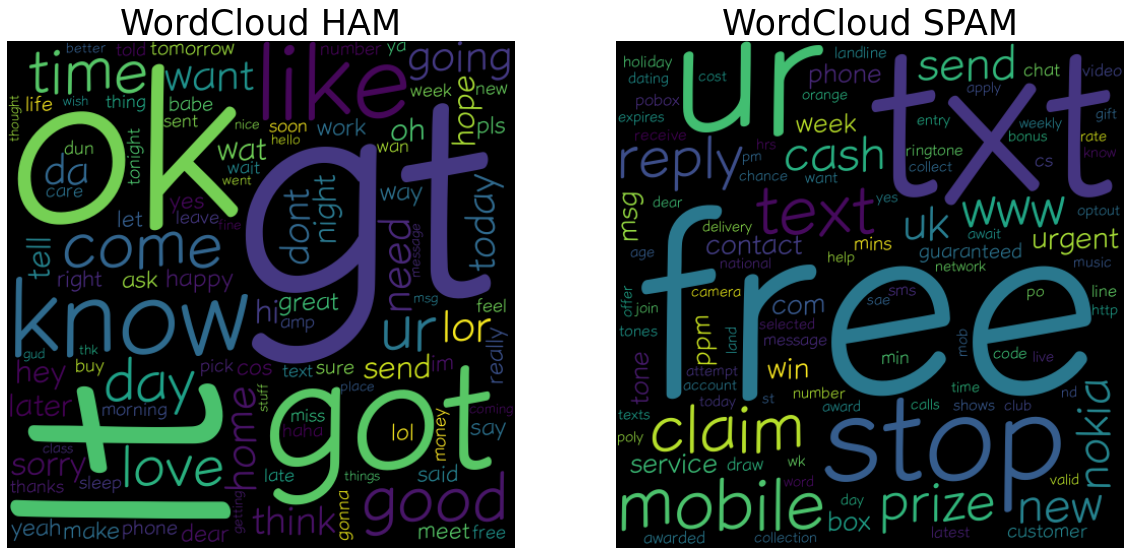

In [76]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('WordCloud HAM', size=35)
count_dic = dict(zip(count_ham['word'], count_ham['count']))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud, interpolation = "bilinear")

plt.subplot(1,2,2)
plt.title('WordCloud SPAM', size=35)
count_dic = dict(zip(count_spam['word'], count_spam['count']))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud, interpolation = "bilinear")